In [15]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [16]:
# Fonction pour charger un fichier CSV
def load_csv(file_path):
    return pd.read_csv(file_path)

# Fonction pour prétraiter les données (imputer les valeurs manquantes et normaliser)
def preprocess_data(df):
    # Imputer les valeurs manquantes avec la moyenne des colonnes
    df_imputed = df.fillna(df.mean())

    # Sélectionner les colonnes de caractéristiques pour la normalisation
    features = df_imputed[['Data_Point', 'Test_Time', 'Step_Time', 'Step_Index', 'Cycle_Index', 
                           'Current', 'Voltage', 'Charge_Capacity', 'Charge_Energy', 'Discharge_Energy', 
                           'dV/dt', 'Internal_Resistance', 'Temperature']]

    # Initialiser le scaler
    scaler = StandardScaler()

    # Ajuster et transformer les données
    features_normalized = scaler.fit_transform(features)

    # Remplacer les colonnes d'origine par les colonnes normalisées dans le DataFrame
    df_imputed[['Data_Point', 'Test_Time', 'Step_Time', 'Step_Index', 'Cycle_Index', 
                'Current', 'Voltage', 'Charge_Capacity', 'Charge_Energy', 'Discharge_Energy', 
                'dV/dt', 'Internal_Resistance', 'Temperature']] = features_normalized

    return df_imputed

# Fonction pour tracer le maximum de Discharge Capacity par Cycle_Index
def plot_max_discharge_capacity(file_path):
    # Lire le fichier CSV
    df = load_csv(file_path)

    # Prétraiter les données
    df_preprocessed = preprocess_data(df)

    # Calculer le maximum de Discharge Capacity par Cycle_Index
    max_discharge_capacity = df_preprocessed.groupby('Cycle_Index')['Discharge_Capacity'].max()

    # Créer une figure pour le graphique
    plt.figure(figsize=(10, 6))

    # Tracer le maximum de Discharge Capacity pour chaque Cycle_Index
    plt.plot(max_discharge_capacity.index, max_discharge_capacity.values, label=os.path.basename(file_path))

    plt.xlabel('Cycle Index')
    plt.ylabel('Maximum Discharge Capacity')
    plt.title('Maximum Discharge Capacity vs Cycle Index')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


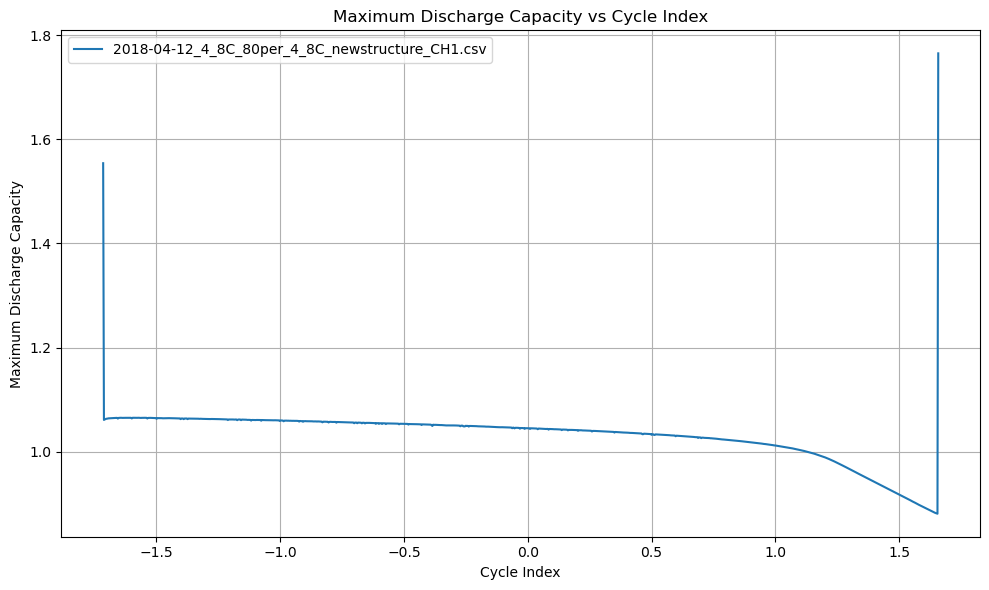

In [17]:
# Chemin vers le fichier CSV spécifique
file_path = 'C:\\Users\\pc\\Desktop\\data\\batch 3\\2018-04-12_4_8C_80per_4_8C_newstructure_CH1.csv'

# Appeler la fonction pour tracer les données
plot_max_discharge_capacity(file_path)
